# **Практика 4 (3). Частотные таблицы. Визуализация**

У вас есть данные о популярных фильмах и сериалах на стриминговом сервисе за один месяц. Каждый объект — это фильм или сериал, который попадал в топ‑листы по просмотрам.

Датасет лежит по ссылке: https://github.com/ksumarshmallow/PythonMentor/blob/main/data_analysis/data/netflix_titles.csv

- `title` — название контента
- `country` — страна производства
- `date_added` — дата добавления на платформу
- `release_year` — год релиза
- `rating` — возрастной рейтинг
- `duration` — длительность: для фильмов в минутах, для сериалов — количество сезонов
- `listed_in` — жанры / категории (строка с перечислением жанров через запятую)


In [22]:
import pandas as pd

df = pd.read_csv("../data/netflix_titles.csv")
df.head(2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


## **Задание 1**

### *Задание 1.1*
>*Создайте новый **числовой** признак `duration_minutes` - производное от признака `duration`. Нужно убрать **min** из значения, оставив только цифру*

In [23]:
df['duration_minutes'] = df['duration'].apply(lambda x: int(x.replace(' min', '')))
df.head(3)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes
0,81145628,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,90
1,80117401,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,94
2,80125979,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,99


### *Задание 1.2*
>*Постройте график, который показывает распределение продолжительности **фильмов** (`duration_minutes`). Используйте **гистограмму**.*

<Axes: ylabel='Frequency'>

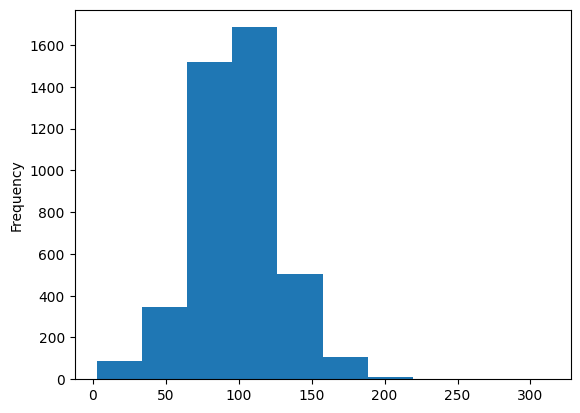

In [24]:
df['duration_minutes'].plot(kind='hist')

### *Задание 1.3*
>*Отметьте верное утверждение про длительность фильмов:*
>- *Большая часть фильмов имеет длительность менее 50 минут*
>- *Большая часть фильмов имеет длительность не менее 120 минут*
>- *В данных представлены фильмы с длительностью более 400 минут*
>- *Большинство фильмов сосредоточены около длительности 80-120 минут*


**Ответ**:  Большинство фильмов сосредоточены около длительности 80-120 минут

## **Задание 2**

### *Задание 2.1*
>*Постройте график, описывающий зависимость года релиза (`release_year`) от длительности фильма (`duration_minutes`)*

<Axes: xlabel='release_year', ylabel='duration_minutes'>

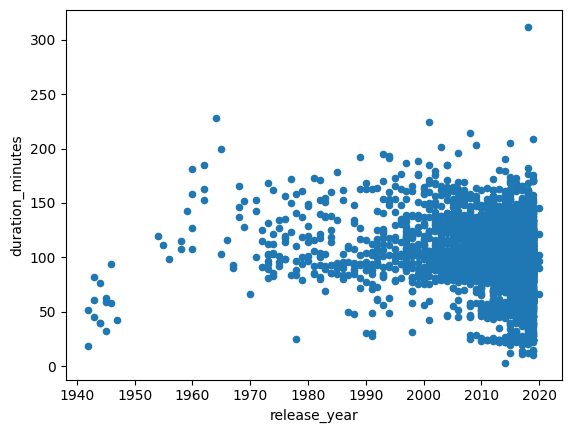

In [25]:
df.plot('release_year', 'duration_minutes', kind='scatter')

### *Задание 2.2*
>*Отметьте верное утверждение про зависимость длительности фильма от года релиза:*
>- *В данных есть фильмы до 1960 года с длительностью более 150 минут*
>- *Большинство фильмов 1990‑х имеют длительность около 60 минут*
>- *Большинство фильмов имеют длительность 100-150 минут*
>- *В данных нет фильмов до 1980 года с длительностью более 200 минут*

**Ответ**: Большинство фильмов имеют длительность 100-150 минут

## **Задание 3**

### *Задание 3.1*
>*В какой стране (`country`) было выпущено больше всего фильмов?*
>*Укажите*:
>- название страны: ???
>- количество фильмов: ???

In [26]:
df['country'].value_counts().head(1)

country
United States    1482
Name: count, dtype: int64

**Ответ**:
- страна: United States
- фильмов: 1482

### *Задание 3.2*
>*Постройте столбчатую диаграмму, показывающую, как распределено количество фильмов по странам (`country`). Возьмите **топ‑10** стран по количеству выпущенных на нетфликсе фильмов.*

<Axes: xlabel='country'>

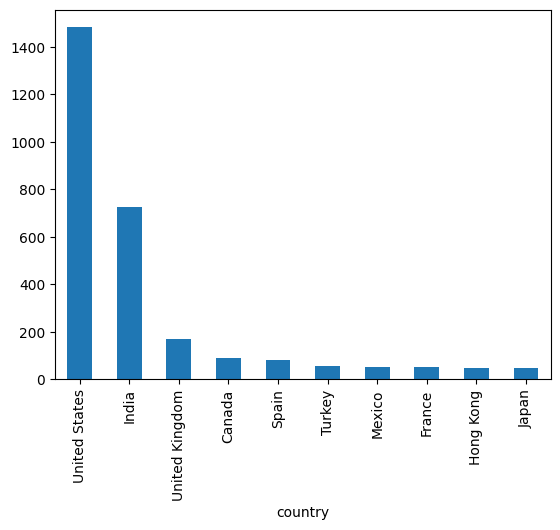

In [27]:
df['country'].value_counts().head(10).plot(kind='bar')

## **Задание 4**

>*Укажите количество продюсеров (`director`), которые выпустили ровно один фильм на нетфликсе.*

In [32]:
dir_val = df.value_counts('director')
dir_val[dir_val==1].shape

(2667,)

**Ответ**: 2667

## **Задание 5**

### *Задание 5.1*
>Найдите год `release_year`, в котором было выпущено наибольшее количество фильмов.

In [35]:
df.release_year.value_counts().head(3)

release_year
2017    682
2018    646
2016    593
Name: count, dtype: int64

**Ответ**: 2017

### *Задание 5.2*
>Постройте линейный график, показывающий динамику количества фильмов по годам релиза (`release_year`)


<Axes: xlabel='release_year'>

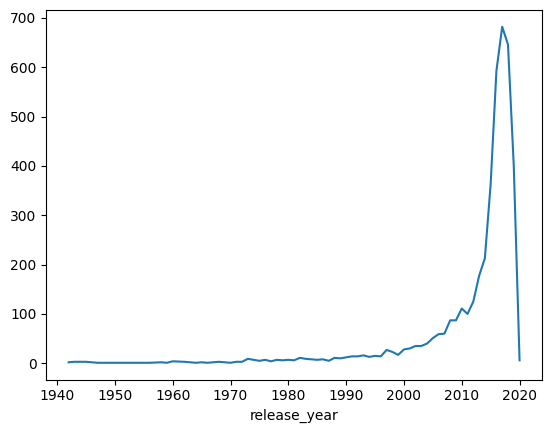

In [36]:
df.release_year.value_counts().sort_index().plot()

## **Задание 6**

### *Задание 6.1*
>Создайте новый признак `main_genre`, в котором будет содержаться первый жанр из столбца `listed_in` (строка жанров, разделённых запятой).
>HINT: используйте метод строки `.split()` (укажите нужный параметр)

In [38]:
df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])

### *Задание 6.2*
>Укажите жанр (`main_genre`), который встречается чаще всего.

In [39]:
df['main_genre'].value_counts().head(3)

main_genre
Dramas           1077
Comedies          803
Documentaries     644
Name: count, dtype: int64

**Ответ**: `Dramas`

### *Задание 6.3*
>Постройте круговую диаграмму, отражающую распределение количества тайтлов по `main_genre` (возьмите **топ‑10** жанров).

<Axes: ylabel='count'>

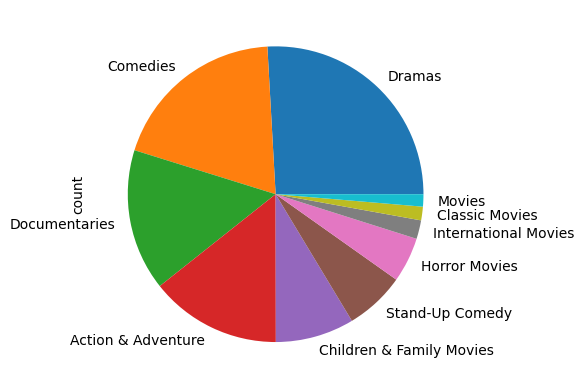

In [40]:
df['main_genre'].value_counts().head(10).plot(kind='pie')